In [1]:
import numpy as np
from scipy.stats import *
from sympy import *
from IPython.display import Math
from scipy import optimize

# 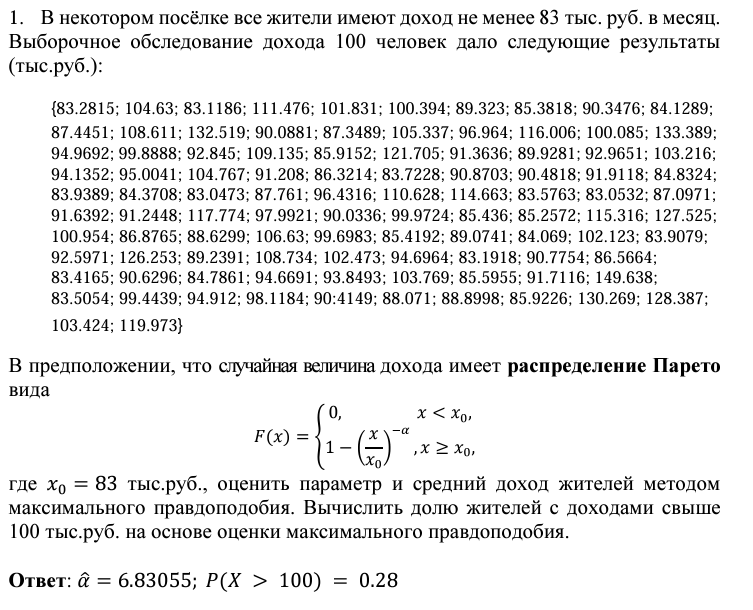

In [2]:
x,x_0,a = symbols('x x_0 alpha', real=True, positive=True)
F = 1- (x/x_0)**(-a)

text = """{83.2815; 104.63; 83.1186; 111.476; 101.831; 100.394; 89.323; 85.3818; 90.3476; 84.1289; 87.4451; 108.611; 132.519; 90.0881; 87.3489; 105.337; 96.964; 116.006; 100.085; 133.389; 94.9692; 99.8888; 92.845; 109.135; 85.9152; 121.705; 91.3636; 89.9281; 92.9651; 103.216; 94.1352; 95.0041; 104.767; 91.208; 86.3214; 83.7228; 90.8703; 90.4818; 91.9118; 84.8324; 83.9389; 84.3708; 83.0473; 87.761; 96.4316; 110.628; 114.663; 83.5763; 83.0532; 87.0971; 91.6392; 91.2448; 117.774; 97.9921; 90.0336; 99.9724; 85.436; 85.2572; 115.316; 127.525; 100.954; 86.8765; 88.6299; 106.63; 99.6983; 85.4192; 89.0741; 84.069; 102.123; 83.9079; 92.5971; 126.253; 89.2391; 108.734; 102.473; 94.6964; 83.1918; 90.7754; 86.5664; 83.4165; 90.6296; 84.7861; 94.6691; 93.8493; 103.769; 85.5955; 91.7116; 149.638; 83.5054; 99.4439; 94.912; 98.1184; 90:4149; 88.071; 88.8998; 85.9226; 130.269; 128.387; 103.424; 119.973}"""
ft = np.array(list(map(float, text.replace('{','').replace('}','').replace(':','.').split('; '))))

F = F.subs({x_0:83})
f = F.diff(x)


L = 1
for i in ft:
    L*=f.subs({x:i})
alpha = solve(log(L).diff(a))[0]
display(Math(r'\hat{\alpha} = ' + latex(alpha)))

display(Math(r'P(X>100) = ' + latex(1 - F.subs({x:100,a:alpha}))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 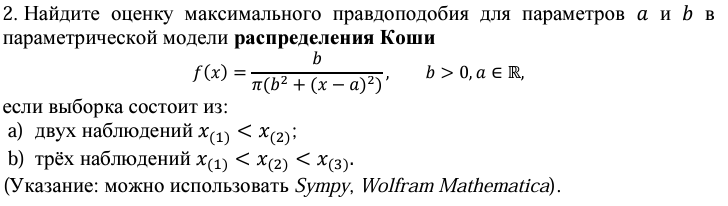

In [3]:
x,a,b = symbols(r'x,\hat{a},\hat{b}',real=True, positive=True)
x1,x2,x3 = symbols('x1 x2 x3',real=True)

f = b/(pi*(b**2 + (x-a)**2))

L = 1
for i in [x1, x2]:
    L *= f.subs({x:i})
a_solved = solve(diff(log(L), a))[0][a]
b_solved = solve(diff(log(L).subs({a:a_solved}), b))[0][b]
display(Math('a)'+r'\begin{cases}'+r'\hat{a} = ' + latex(a_solved)+r'\\'+r'\hat{b} = ' + latex(b_solved)+r'\end{cases}'))

# Логарифм функции правдоподобия
log_L = sum(log(b / (pi * (b**2 + (xi - a)**2))) for xi in [x1, x2, x3])

# Производные по a и b
d_log_L_da = simplify(diff(log_L, a))
d_log_L_db = simplify(diff(log_L, b))

# Решаем систему уравнений
display(Math(r'b)\text{Оценки максимального правдоподобия можно найти из системы(в общем виде не решается):}\\~\\'+\
    r'\begin{cases}'+\
        latex(d_log_L_da)+' = 0'+r'\\~\\'+\
        latex(d_log_L_db)+' = 0'+\
    r'\end{cases}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 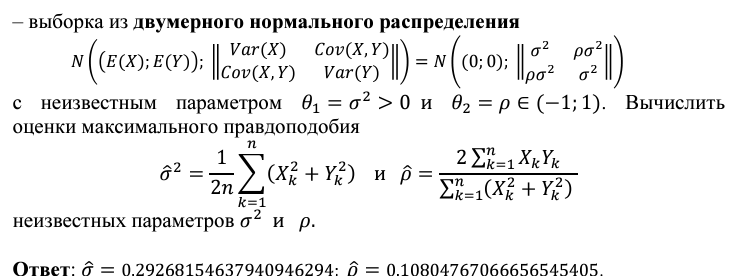

In [4]:
text = '''{(-0.313894;0.438015); (0.224722;-0.449328); (-0.639293;-0.363361); (-0.167994;0.20571); (0.0522341;0.138561); (-0.254661;0.201998); (0.0442204;-0.112244); (0.228834;0.519609);  (0.0228787;0.56386); (0.385821;-0.218754); (-0.232476;-0.146833); (0.243587;-0.221924); (0.265534;-0.260073); (-0.269157;0.336143); (-0.0271373;-0.226327); (0.153953;-0.0805482); (0.32428;-0.200066); (0.277462;-0.192794); (0.499289;0.50847); (0.0959331;0.166319); (0.202464;-0.434938); (0.0728366;0.269327); (-0.340479;-0.414939); (-0.417083;0.0375611); (-0.246902;0.11803); (-0.234504;-0.0344259); (-0.0546271;0.567266); (0.0739474;0.533507); (0.183865;-0.0358313); (-0.258409;0.292343); (0.176683;0.188972); (-0.646468;-0.127734); (0.761451;0.273523); (0.0708475;0.183211); (-0.649315;0.0842457); (0.454164;-0.120189);  (0.083444;0.136907); (-0.50404;0.344105); (0.306273;0.504922); (0.0915694;-0.363476); (-0.176519;0.185783); (0.198926;-0.142638); (-0.403642;0.0596804); (0.572447;0.123529); (0.0274817;-0.284917); (0.407448;0.28937); (-0.225413;-0.77905); (-0.254338;0.335472); (-0.102176;-0.13015); (-0.0889893;0.16551); (0.352058;0.252975); (-0.158156;0.189951); (-0.319835;0.196627); (0.123115;0.171234); (0.132341;-0.00637201); (0.28239;-0.498863); (0.0890051;-0.326061); (-0.148438;0.0429142); (0.571535;0.416794); (0.0371119;0.460548); (0.273852;0.0160622); (-0.339359;-0.0626746); (0.440342;0.538688); (0.0628227;0.0194897); (0.443774;0.373888); (0.280735;-0.0541218); (0.0885035;-0.491287); (0.0734594;-0.0738522); (0.186268;0.0396739); (-0.121944;0.243752); (-0.131286;0.0808547); (-0.0165996;0.213765); (0.222346;-0.0190641); (-0.139473;-0.502365); (-0.0619227;-0.434108); (0.182899;0.0912378); (-0.0910926;0.117352); (-0.383352;0.0537915); (0.340066;0.213886); (-0.263456;-0.0674588); (-0.27111;-0.306004); (-0.188309;0.203076); (0.0918992;0.233086); (0.213978;0.00972123); (-0.10169;-0.303658); (-0.074131;0.297038); (-0.335425;-0.275405); (0.199969;0.404614); (-0.194719;-0.504087); (-0.124675;-0.201565); (0.481352;0.0167409); (0.417754;-0.0899433); (-0.215485;-0.102225); (-0.105139;-0.449874); (0.389487;-0.578755); (-0.585644;0.01085); (-0.493355;0.167084); (-0.225548;0.0896084); (0.0628588;0.0552897); (0.154798;-0.0499213)}'''
XY = np.array([i.replace('(','').replace(')','').split(';') for i in text.replace('  ',' ').replace('{','').replace('}','').split('; ')]).astype(float)
X,Y = (XY[:,0]),(XY[:,1])

display(Math(r'\hat{\sigma} = '+latex(np.sqrt(1/(2*len(X))*(X**2+Y**2).sum()))))
display(Math(r'\hat{\rho} = '+latex((2*(X*Y)).sum()/(X**2+Y**2).sum())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#
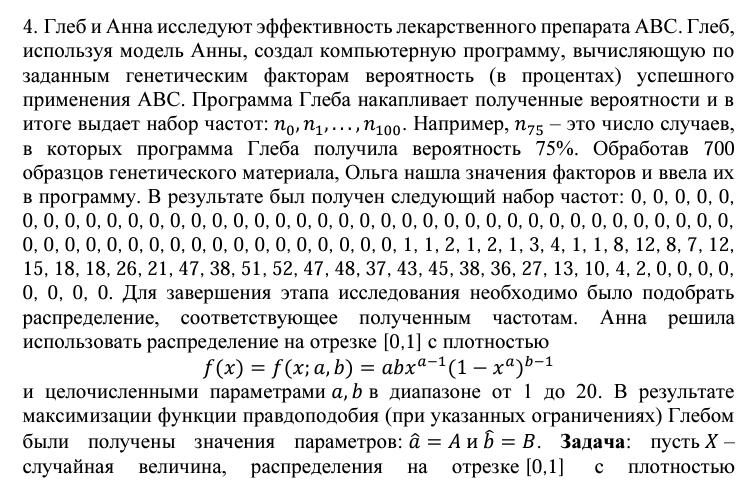
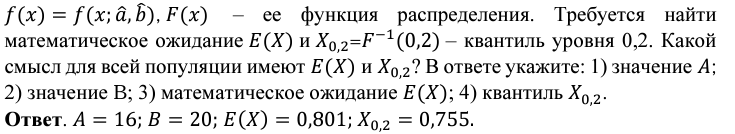

In [5]:
nu = np.array([np.float64(i) for i in '0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 3, 4, 1, 1, 8, 12, 8, 7, 12, 15, 18, 18, 26, 21, 47, 38, 51, 52, 47, 48, 37, 43, 45, 38, 36, 27, 13, 10, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0'.split(',')])

x,n = symbols('x,n',integer=True, positive=True)
a,b =symbols(r'\hat{a}, \hat{b}',integer=True, positive=True)

f = a*b*x**(a-1)*(1-x**a)**(b-1)


L = sum( [ i*log(f.subs({x:j})) for i,j in zip(nu,np.linspace (0,1,len(nu))) ] )

chan = lambda soup:-L.subs({a:soup[0],b:soup[1]})

out = optimize.minimize(chan,[10,10],bounds=([1,20],[1,20]))
A,B = [round(_) for _ in out.x]
display(Math('A = ' +str(A) +r'\\' +'B=' + str(B)))

E = integrate(x*f.subs({a:A,b:B}),(x,0,1))
display(Math(r'\mathbb{E}(X) = ' +str(E.evalf())))

F = integrate(f.subs({a:A,b:B}),(x,0,x))
shash = lambda cucumber: np.float64(F.subs({x:cucumber})-0.2)
Q = optimize.root_scalar(shash,bracket=[0,1]).root
display(Math(r'X_{0,2} = ' +str(Q)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>